# All variables distribution

In [1]:
import netCDF4 as nc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import matplotlib.ticker as mticker
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

## thetao

In [2]:
import cartopy
print(cartopy.config)

{'pre_existing_data_dir': PosixPath('.'), 'data_dir': PosixPath('/home/mafzhang/.local/share/cartopy'), 'cache_dir': PosixPath('/tmp/cartopy_cache_dir'), 'repo_data_dir': PosixPath('/home/mafzhang/miniconda3/envs/pytorch/lib/python3.9/site-packages/cartopy/data'), 'downloaders': {('shapefiles', 'natural_earth'): <cartopy.io.shapereader.NEShpDownloader object at 0x7f1f949d3a30>, ('shapefiles', 'gshhs'): <cartopy.io.shapereader.GSHHSShpDownloader object at 0x7f1f949dc910>}}


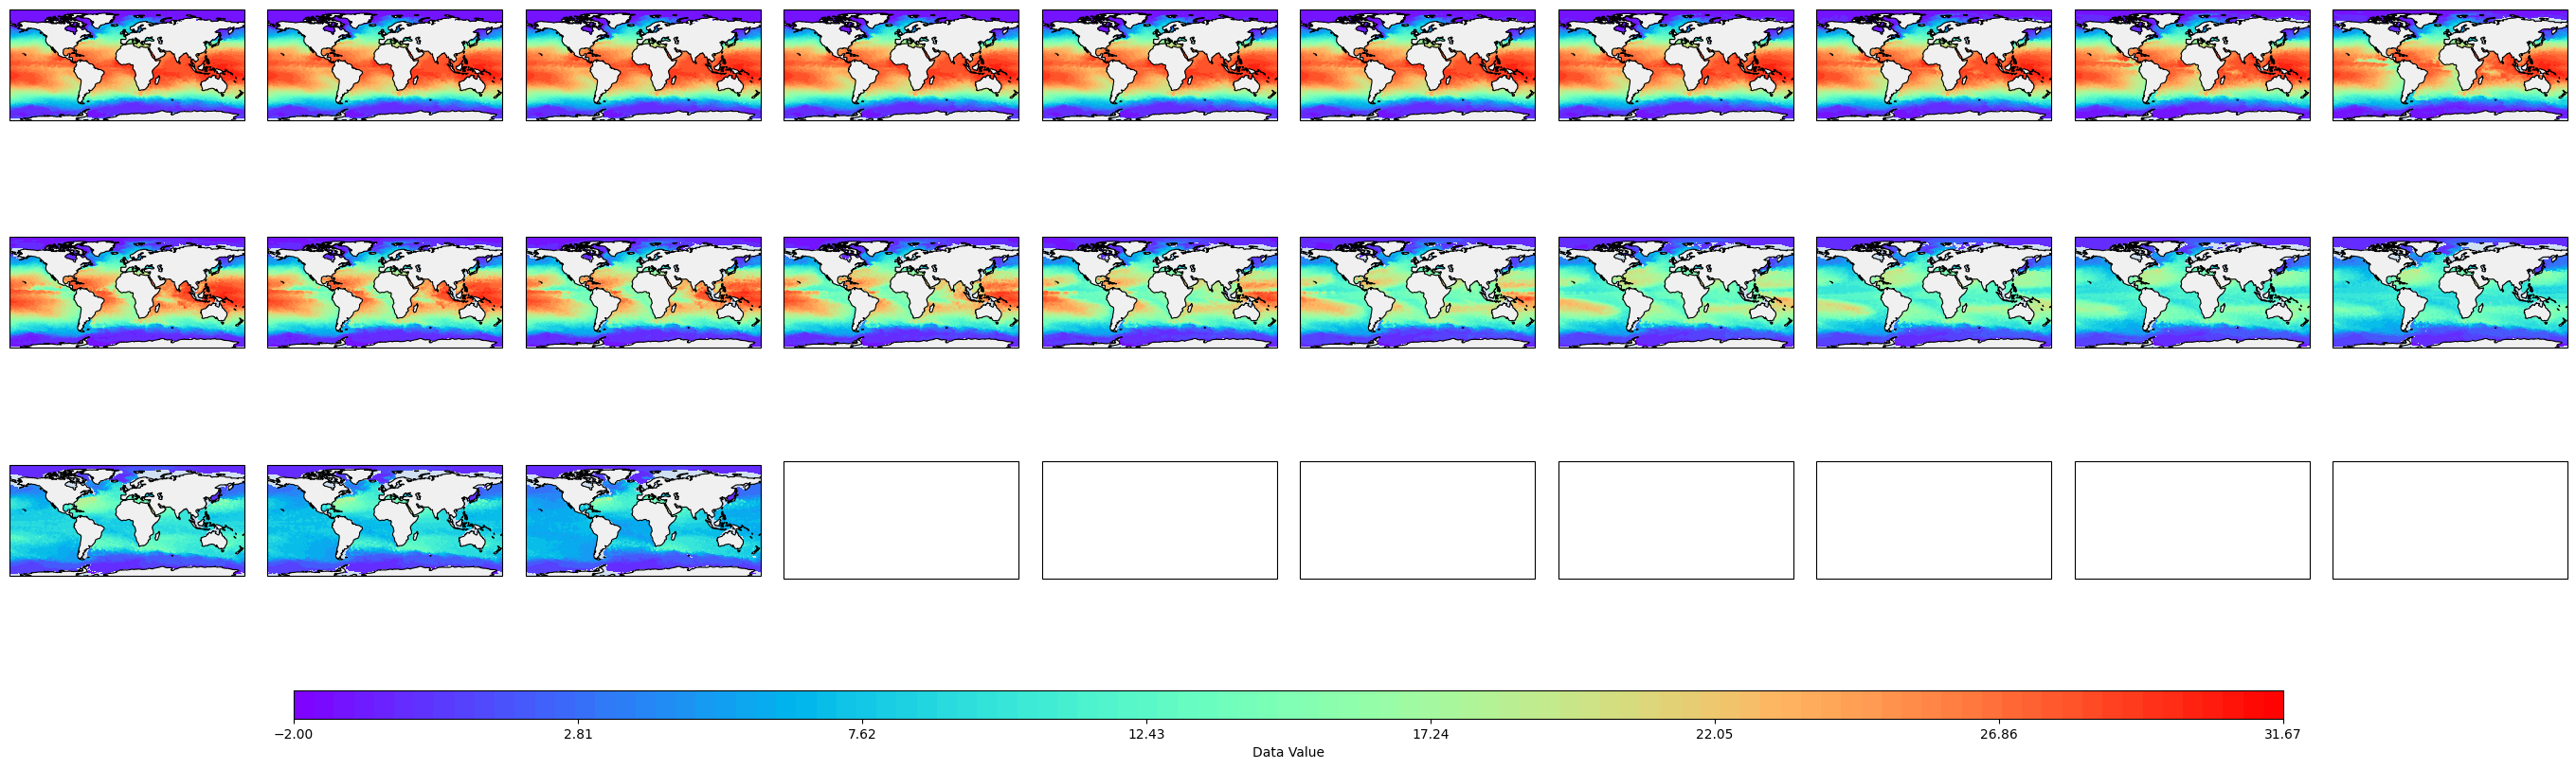

In [3]:
fig, axes = plt.subplots(nrows=3, ncols=10, figsize=(30, 10),
                      subplot_kw={'projection': ccrs.PlateCarree()})
fig.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.2, wspace=0.1, hspace=0.1)  # 调整布局，为底部 colorbar 留出更多空间



data = nc.Dataset("/import/home2/mafzhang/data/GLORYS12_bio/2023-bak/Glorys12-carbon-01-01.nc")
mean = np.load("../constant/mean_phys.npy")
std = np.load("../constant/std_phys.npy")
lat = np.array(data.variables['latitude'])
lon = np.array(data.variables['longitude'])

lat1 = np.nanmin(lat)
lat2 = np.nanmax(lat)
lon1 = np.nanmin(lon)
lon2 = np.nanmax(lon)

lon, lat = np.meshgrid(lon, lat)
theta = np.load("/import/home2/mafzhang/data/GLORYS12/2023/thetao-01-01.nc.npy")
# theta = (theta - mean[0][np.newaxis,:,np.newaxis, np.newaxis])/std[0][np.newaxis,:,np.newaxis, np.newaxis]
theta_max = np.nanmax(theta)
theta_min = np.nanmin(theta)

# 遍历每个子图
for i in range(3):
    for j in range(10):
        index = i*10+j
        if index>=23:
            break
        ax = axes[i, j]
        ax.set_extent([lon1, lon2, lat1, lat2], crs=ccrs.PlateCarree())
        tmp = theta[0,index]

        # 添加基础地理特征
        ax.add_feature(cfeature.LAND, facecolor='#f0f0f0')
        ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
        ax.add_feature(cfeature.OCEAN, facecolor='#d0e0f0')

        contourf = ax.contourf(lon, lat, tmp, 
                                levels=np.linspace(theta_min, theta_max, 100),
                                cmap='rainbow',    # 颜色映射
                                transform=ccrs.PlateCarree())
        
cbar_ax = fig.add_axes([0.15, 0.1, 0.7, 0.03])  # 增大 height 的值，使 colorbar 更宽
cbar = fig.colorbar(contourf, ticks=np.linspace(theta_min, theta_max, 8), cax=cbar_ax,orientation='horizontal', label='Data Value')

plt.show()

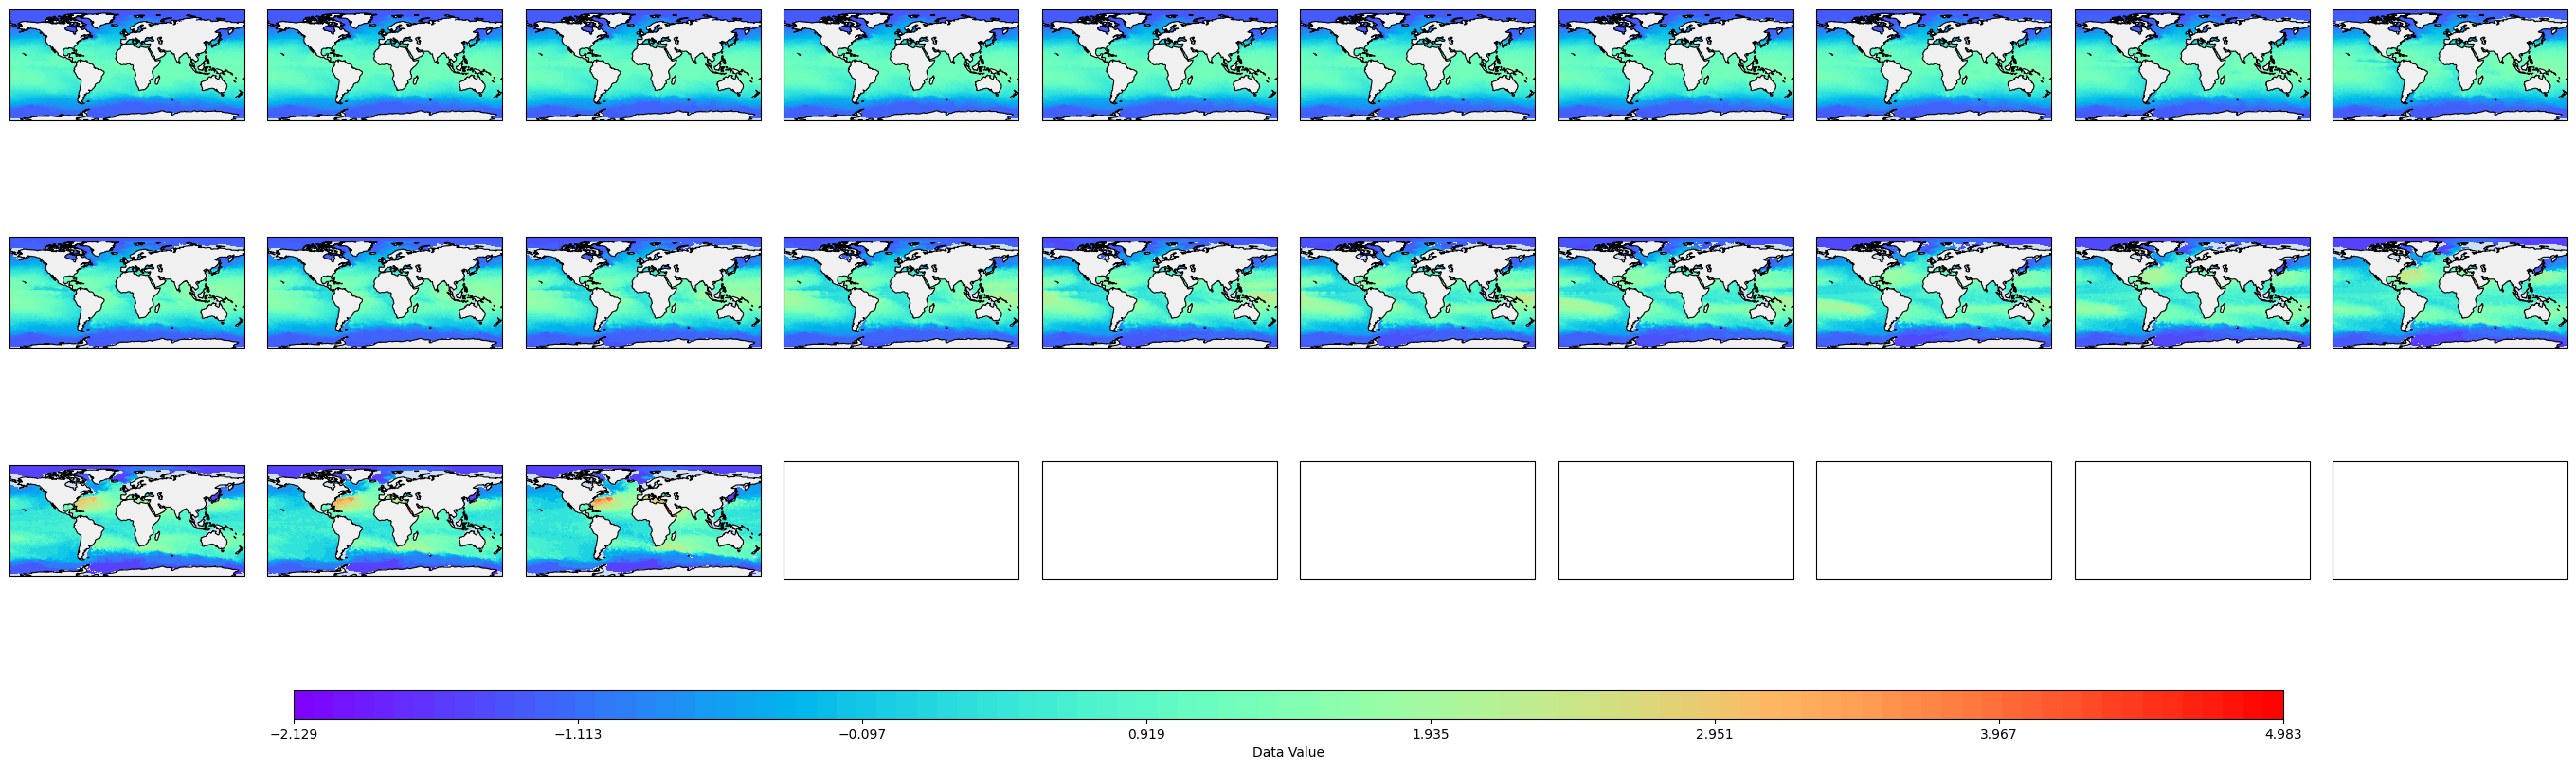

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=10, figsize=(30, 10),
                      subplot_kw={'projection': ccrs.PlateCarree()})
fig.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.2, wspace=0.1, hspace=0.1)  # 调整布局，为底部 colorbar 留出更多空间



data = nc.Dataset("/import/home2/mafzhang/data/GLORYS12_bio/2023-bak/Glorys12-carbon-01-01.nc")
mean = np.load("../constant/mean_phys.npy")
std = np.load("../constant/std_phys.npy")
lat = np.array(data.variables['latitude'])
lon = np.array(data.variables['longitude'])

lat1 = np.nanmin(lat)
lat2 = np.nanmax(lat)
lon1 = np.nanmin(lon)
lon2 = np.nanmax(lon)

lon, lat = np.meshgrid(lon, lat)
theta = np.load("/import/home2/mafzhang/data/GLORYS12/2023/thetao-01-01.nc.npy")
theta = (theta - mean[0][np.newaxis,:,np.newaxis, np.newaxis])/std[0][np.newaxis,:,np.newaxis, np.newaxis]
theta_max = np.nanmax(theta)
theta_min = np.nanmin(theta)

# 遍历每个子图
for i in range(3):
    for j in range(10):
        index = i*10+j
        if index>=23:
            break
        ax = axes[i, j]
        ax.set_extent([lon1, lon2, lat1, lat2], crs=ccrs.PlateCarree())
        tmp = theta[0,index]

        # 添加基础地理特征
        ax.add_feature(cfeature.LAND, facecolor='#f0f0f0')
        ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
        ax.add_feature(cfeature.OCEAN, facecolor='#d0e0f0')

        contourf = ax.contourf(lon, lat, tmp, 
                                levels=np.linspace(theta_min, theta_max, 100),
                                cmap='rainbow',    # 颜色映射
                                transform=ccrs.PlateCarree())
        
cbar_ax = fig.add_axes([0.15, 0.1, 0.7, 0.03])  # 增大 height 的值，使 colorbar 更宽
cbar = fig.colorbar(contourf, ticks=np.linspace(theta_min, theta_max, 8), cax=cbar_ax,orientation='horizontal', label='Data Value')

plt.show()

In [5]:
print(mean[0])
print(std[0])

[14.09527794 14.07194422 14.05834617 14.04176421 14.03052148 14.01263654
 13.9595837  13.84374642 13.61559612 13.18643361 12.50978427 12.09787616
 11.62207598 11.05421549 10.42316855  9.77900849  9.14715352  8.48382178
  7.78128506  7.06059932  6.33583768  5.59385657  4.88539296]
[11.44395469 11.42296669 11.41506955 11.40051113 11.38903151 11.37242853
 11.34283763 11.27381441 11.10717687 10.76861357 10.2049562   9.81339688
  9.32624097  8.7391486   8.04845888  7.29938224  6.61709825  5.9674649
  5.3256341   4.74085496  4.20864282  3.70785773  3.23378928]


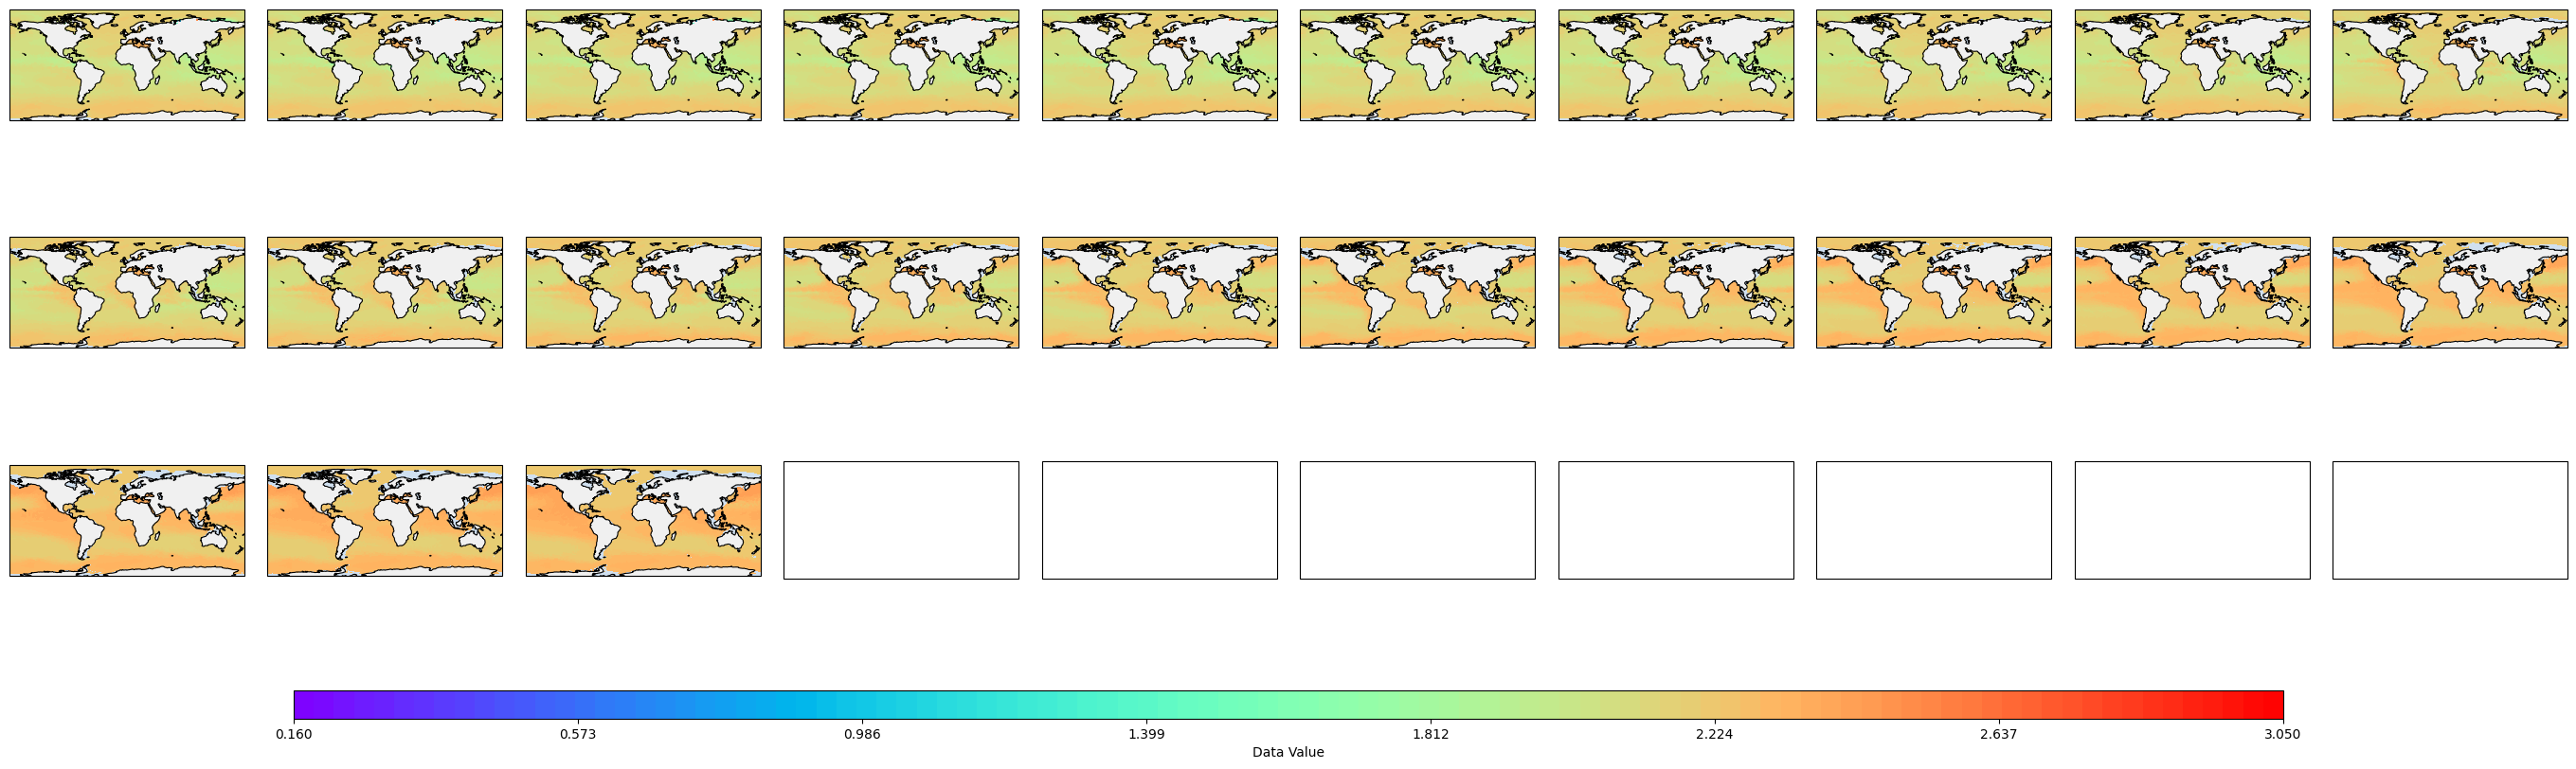

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=10, figsize=(30, 10),
                      subplot_kw={'projection': ccrs.PlateCarree()})
fig.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.2, wspace=0.1, hspace=0.1)  # 调整布局，为底部 colorbar 留出更多空间



data = nc.Dataset("/import/home2/mafzhang/data/GLORYS12_bio/2023-bak/Glorys12-carbon-01-01.nc")
lat = np.array(data.variables['latitude'])
lon = np.array(data.variables['longitude'])

lat1 = np.nanmin(lat)
lat2 = np.nanmax(lat)
lon1 = np.nanmin(lon)
lon2 = np.nanmax(lon)

lon, lat = np.meshgrid(lon, lat)
theta = np.load("/import/home2/mafzhang/data/GLORYS12_bio/2023/dissic-01-01.nc.npy")
theta_max = np.nanmax(theta)
theta_min = np.nanmin(theta)

# 遍历每个子图
for i in range(3):
    for j in range(10):
        index = i*10+j
        if index>=23:
            break
        ax = axes[i, j]
        ax.set_extent([lon1, lon2, lat1, lat2], crs=ccrs.PlateCarree())
        tmp = theta[0,index]

        # 添加基础地理特征
        ax.add_feature(cfeature.LAND, facecolor='#f0f0f0')
        ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
        ax.add_feature(cfeature.OCEAN, facecolor='#d0e0f0')

        contourf = ax.contourf(lon, lat, tmp, 
                                levels=np.linspace(theta_min, theta_max, 100),
                                cmap='rainbow',    # 颜色映射
                                transform=ccrs.PlateCarree())
        
cbar_ax = fig.add_axes([0.15, 0.1, 0.7, 0.03])  # 增大 height 的值，使 colorbar 更宽
cbar = fig.colorbar(contourf, ticks=np.linspace(theta_min, theta_max, 8), cax=cbar_ax,orientation='horizontal', label='Data Value')

plt.show()

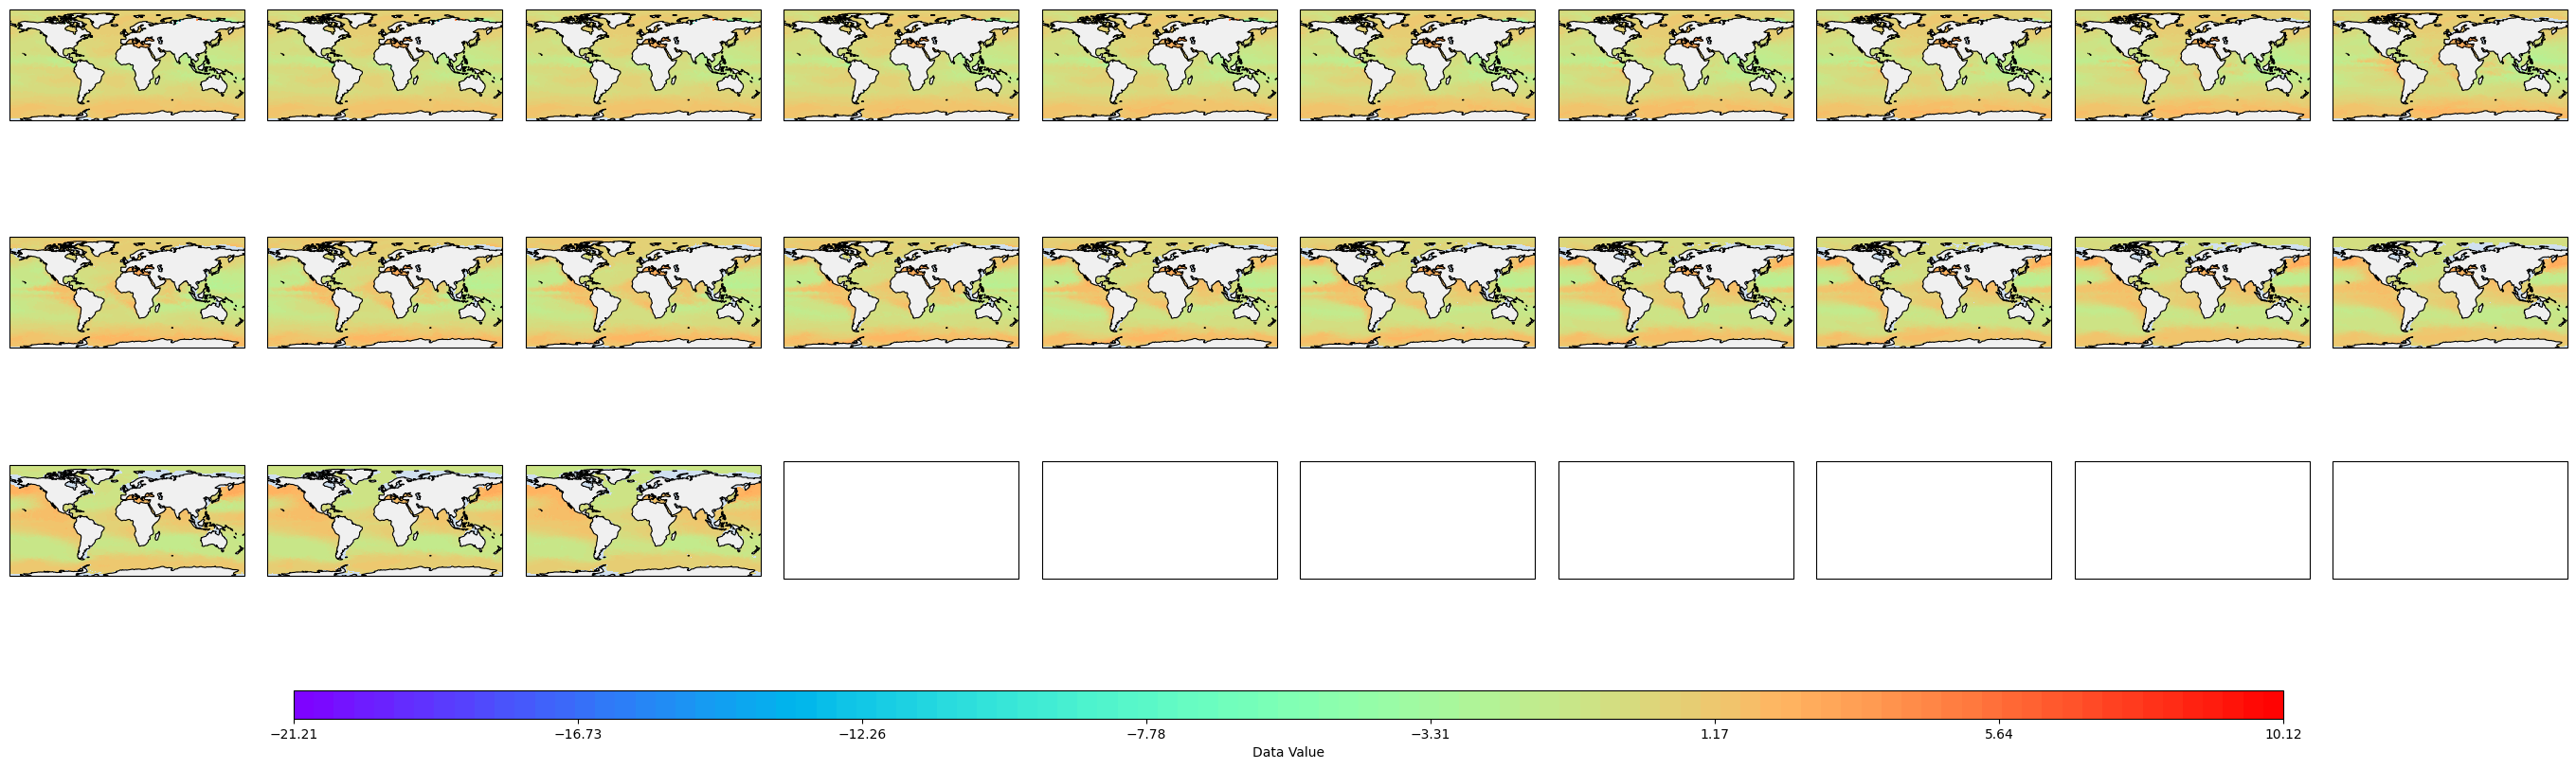

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=10, figsize=(30, 10),
                      subplot_kw={'projection': ccrs.PlateCarree()})
fig.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.2, wspace=0.1, hspace=0.1)  # 调整布局，为底部 colorbar 留出更多空间



data = nc.Dataset("/import/home2/mafzhang/data/GLORYS12_bio/2023-bak/Glorys12-carbon-01-01.nc")
mean = np.load("../constant/mean_bio.npy")
std = np.load("../constant/std_bio.npy")
lat = np.array(data.variables['latitude'])
lon = np.array(data.variables['longitude'])

lat1 = np.nanmin(lat)
lat2 = np.nanmax(lat)
lon1 = np.nanmin(lon)
lon2 = np.nanmax(lon)

lon, lat = np.meshgrid(lon, lat)
theta = np.load("/import/home2/mafzhang/data/GLORYS12_bio/2023/dissic-01-01.nc.npy")
theta = (theta - mean[0][np.newaxis,:,np.newaxis, np.newaxis])/std[0][np.newaxis,:,np.newaxis, np.newaxis]
theta_max = np.nanmax(theta)
theta_min = np.nanmin(theta)

# 遍历每个子图
for i in range(3):
    for j in range(10):
        index = i*10+j
        if index>=23:
            break
        ax = axes[i, j]
        ax.set_extent([lon1, lon2, lat1, lat2], crs=ccrs.PlateCarree())
        tmp = theta[0,index]

        # 添加基础地理特征
        ax.add_feature(cfeature.LAND, facecolor='#f0f0f0')
        ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
        ax.add_feature(cfeature.OCEAN, facecolor='#d0e0f0')

        contourf = ax.contourf(lon, lat, tmp, 
                                levels=np.linspace(theta_min, theta_max, 100),
                                cmap='rainbow',    # 颜色映射
                                transform=ccrs.PlateCarree())
        
cbar_ax = fig.add_axes([0.15, 0.1, 0.7, 0.03])  # 增大 height 的值，使 colorbar 更宽
cbar = fig.colorbar(contourf, ticks=np.linspace(theta_min, theta_max, 8), cax=cbar_ax,orientation='horizontal', label='Data Value')

plt.show()

In [8]:
print(mean[0])
print(std[0])

[2.1094515 2.1095717 2.1098046 2.1105258 2.1115165 2.1142612 2.1162252
 2.1191201 2.123953  2.1325529 2.1467829 2.1563125 2.1670911 2.1786385
 2.1905148 2.2015243 2.2115986 2.2212307 2.231011  2.2414234 2.2517157
 2.2622297 2.2733605]
[0.09295122 0.09260058 0.09190974 0.08900276 0.08578012 0.07914357
 0.07701465 0.07515501 0.07301657 0.0705459  0.06836288 0.06756553
 0.06646784 0.06495579 0.06372294 0.06281393 0.062389   0.06216916
 0.06178994 0.06097344 0.06053349 0.06082354 0.06177282]
